## Genes cluster with PCA+tSNE and mark genes
similarity as Supplementary Fig5 of Rep10

In [1]:
import sys
sys.path.append('../../scGCO_code/')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scGCO_source import *


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
%matplotlib inline

In [4]:
j=9
result_df=read_result_to_dataframe(
    '../../../results/MouseOB/scGCO_results/Rep'+str(j)+'_result_df.csv')
gco_df = result_df[result_df.fdr<0.01]
gco_df.shape

(257, 242)

In [5]:
de_df=pd.read_csv('../../../results/MouseOB/SpatialDE_results/MOB_'+str(j)+'_DE.csv')
de_df.shape

(142, 20)

In [6]:
spark = pd.read_csv('../../../results/MouseOB/SPARK_results/Rep'+str(j)+'_MOB_spark.csv')
spark.shape

(472, 3)

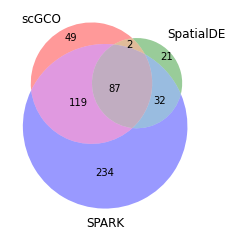

In [7]:
v=venn3(subsets=(set(gco_df.index),set(de_df.g.values),set(spark.genes)),set_labels=['scGCO','SpatialDE','SPARK'])
## set labels names
lal=v.get_label_by_id('B')
x_,y_=lal.get_position()
lal.set_position((x_+0.05,y_))
plt.savefig('../../../results/Figure/Supple_Fig4a.pdf')

### Supple Fig 4a

In [8]:
j=9
tsne_proj_df = pd.read_csv('../../../results/MouseOB/scGCO_results/Gene_Cluster/Rep9_tsne_df_gco_genes.csv',
                           index_col=0)
tsne_proj_df.shape

(257, 3)

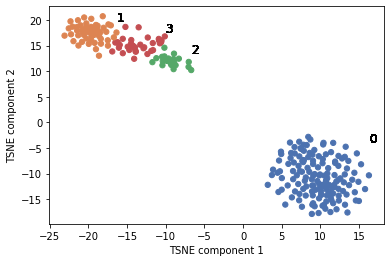

148
52
23
34


In [9]:
plot_tsne(tsne_proj_df.iloc[:,0:2].values,tsne_proj_df.iloc[:,2] ) #,
#           fileName='../../PDF_file/supple_figure/Fig2b.pdf')
for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    cluster_df = gco_df.loc[geneList].sort_values('fdr')
    print(len(geneList))

### Supple_Fig 4b

In [10]:
tsne_proj_df.iloc[:3,]

TSNE1      TSNE2  cluster
Epha4   12.386592 -15.281109        0
Mmd2   -17.500431  16.026056        1
Camkk1  13.501899 -17.608568        0

In [11]:
locs, data, _ = read_spatial_expression('../../../data/Raw_data/MOB-breast_cancer/Rep9_MOB_count_matrix-1.tsv')
data_norm = normalize_count_cellranger(data)

exp= data_norm.iloc[:,0].values
cellGraph= create_graph_with_weight(locs, exp)

raw data dim: (237, 15284)
Number of expressed genes a spot must have to be kept (0.01% of total expressed genes) 2008
Marked 3 spots
Removing genes that are expressed in less than 2 spots with a count of at least 1
Dropped 1153 genes


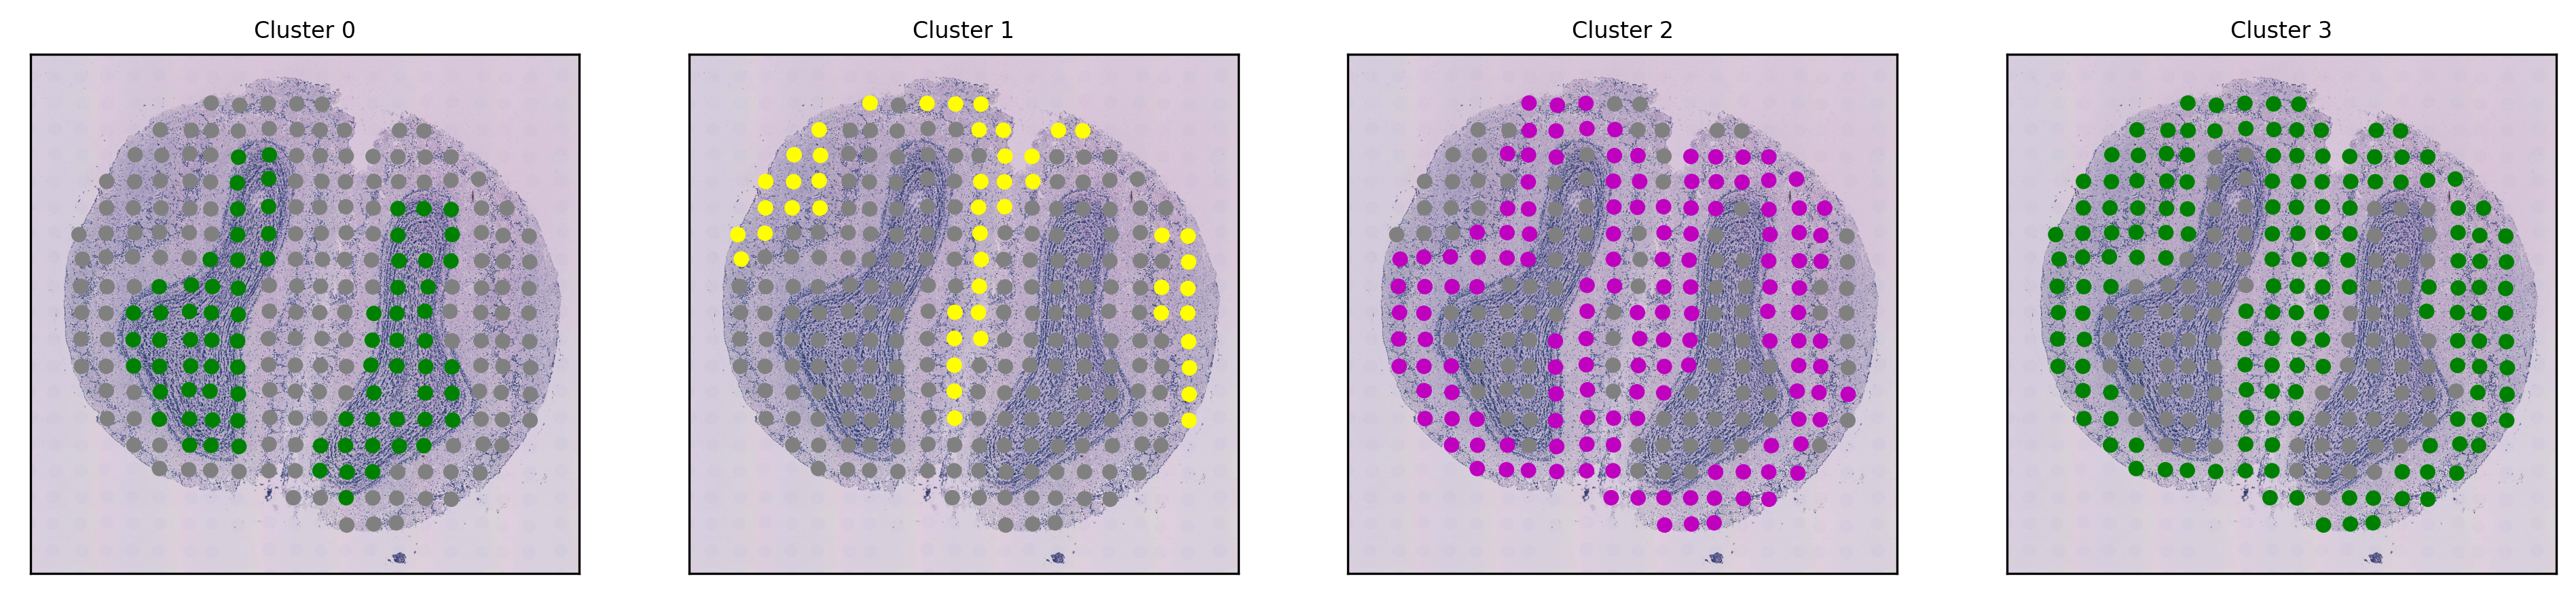

In [15]:
ncols=4
fig,ax=plt.subplots(1,ncols,figsize=(ncols*4,1*4),dpi=300)

for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    KMlables,hmrf_labels=create_labels(locs,data_norm,geneList,cellGraph,
                                       cluster_size=2,unary_scale_factor=100,smooth_factor=20)
    if ck==0:              
        colors=['grey',"green"] 
    if ck==1:              
        colors=["yellow","grey"] 
    if ck==2:               
        colors=["m","grey"]
    if ck==3:                
        colors=["green","grey"] 
        
    image='../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep9_MOB.jpg'
    axes=ax[ck]
    title='Cluster {}'.format(ck)
    subplot_HE_with_labels(locs,hmrf_labels,image,axes,colors,title,s=20)
    axes.set_xticks([],[])
    axes.set_yticks([],[])

plt.show()    

In [17]:
fig.savefig('../../../results/Figure/Supple_Fig4b.pdf')

## Supple_Fig. 4c-f

In [18]:
cluster0=['Pcp4','Nrgn','Map2k1','Penk','Mapk1','Ube2ql1']
cluster1=['Mcf2l','Kif5b','Kctd12','Bgn','Fabp7','Omp']
cluster2 = ['2900097C17Rik','Cdhr1','Cck','Doc2g','Slc17a7','Sncb']
cluster3=['Glul','Sepp1','Apoe','Sparcl1','Aldoc','Kcnj10']

In [19]:
for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    cluster_df = gco_df.loc[geneList].sort_values('fdr')
    [print(genes) if genes not in geneList else 'in' for genes in eval('cluster'+str(ck))] 
    print(len(geneList))
    
#     multipage_pdf_visualize_spatial_genes(cluster_df,locs, data_norm, cellGraph,
#     fileName=))

148
52
23
34


Pcp4 4.044599344648603e-05
Nrgn 1.4001961796870905e-05
Map2k1 3.278114391463548e-05
Penk 4.2309498473312924e-05
Mapk1 8.805547617026486e-05
Ube2ql1 0.0017832334737925603


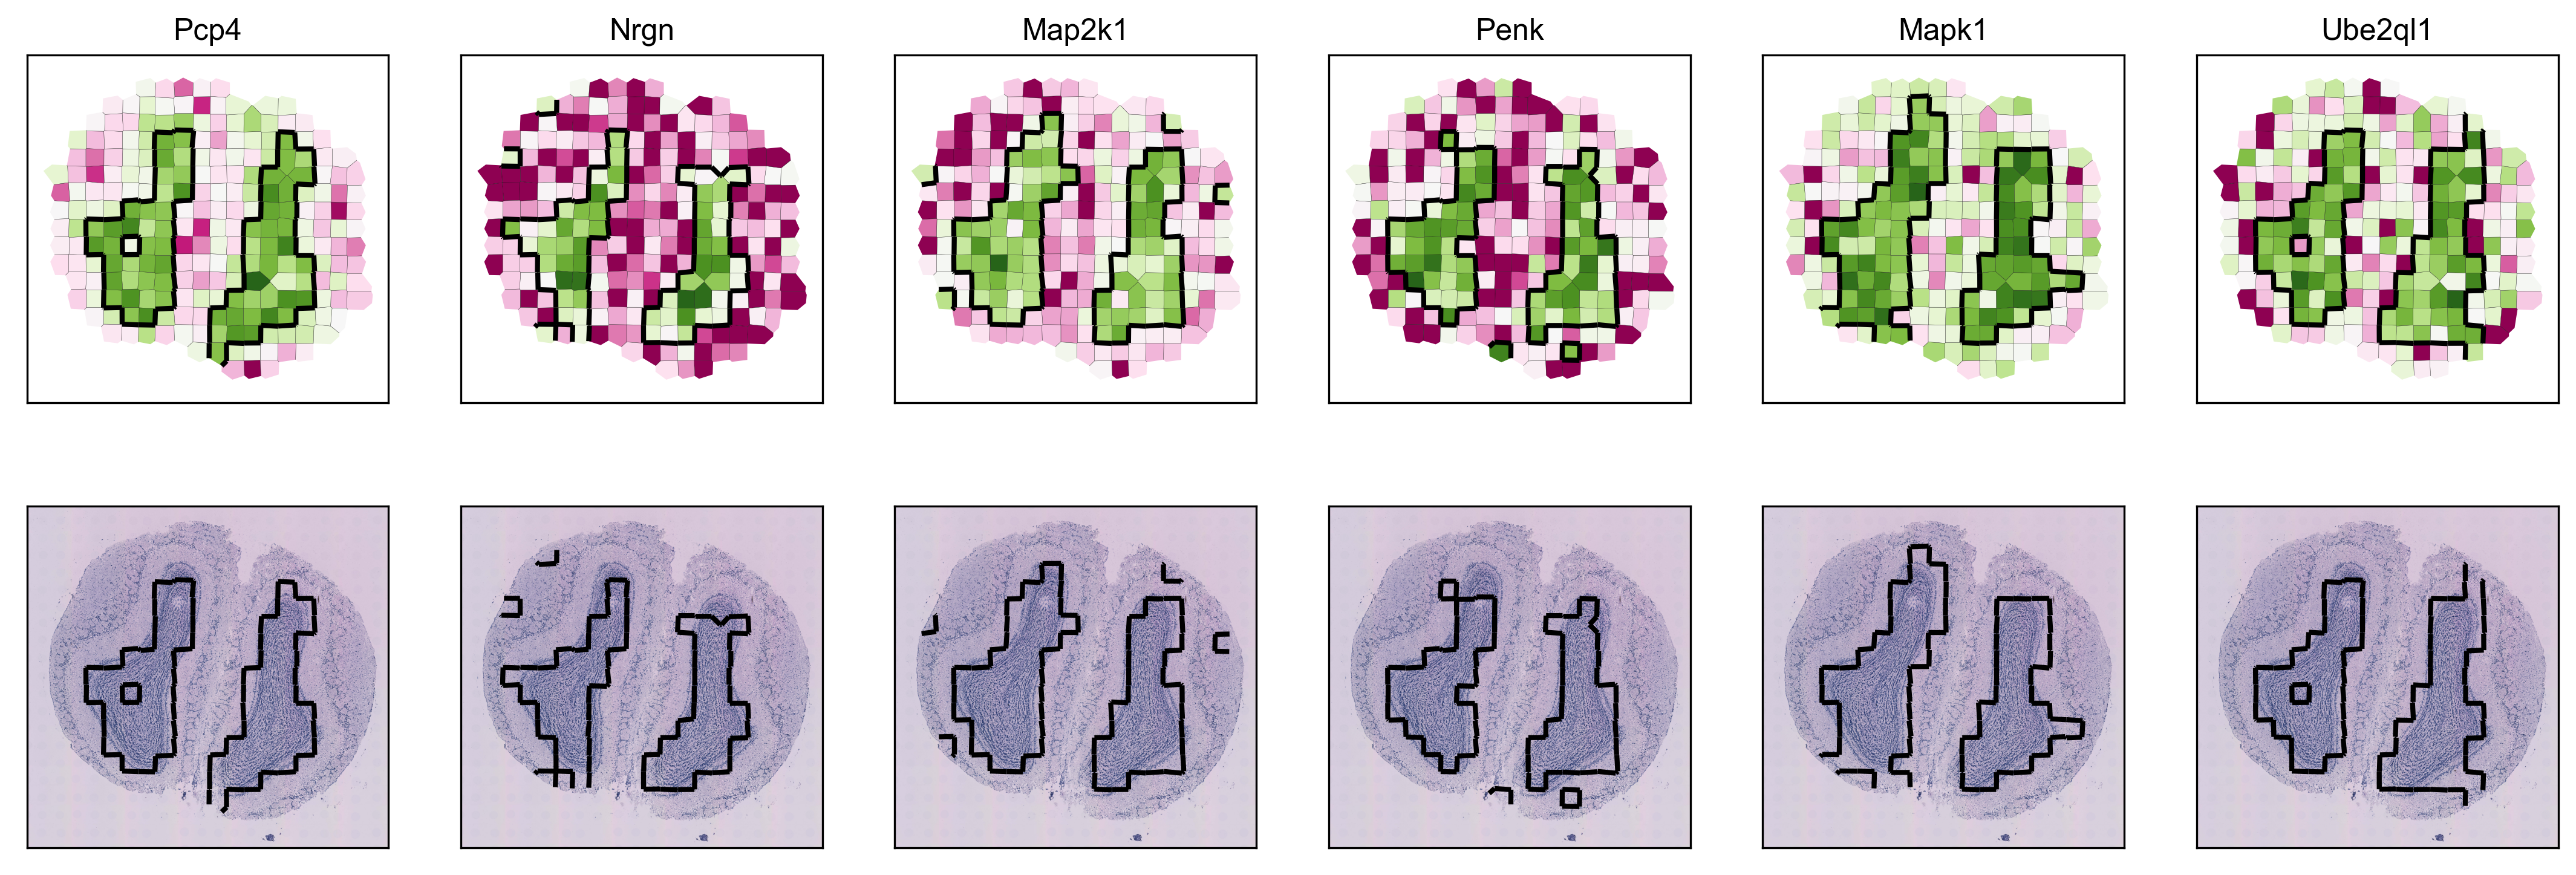

In [21]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster0):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][5:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID,p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.1, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#plt.tight_layout()
plt.show()    

In [23]:
fig.savefig('../../../results/Figure//Supple_Fig4c.pdf')

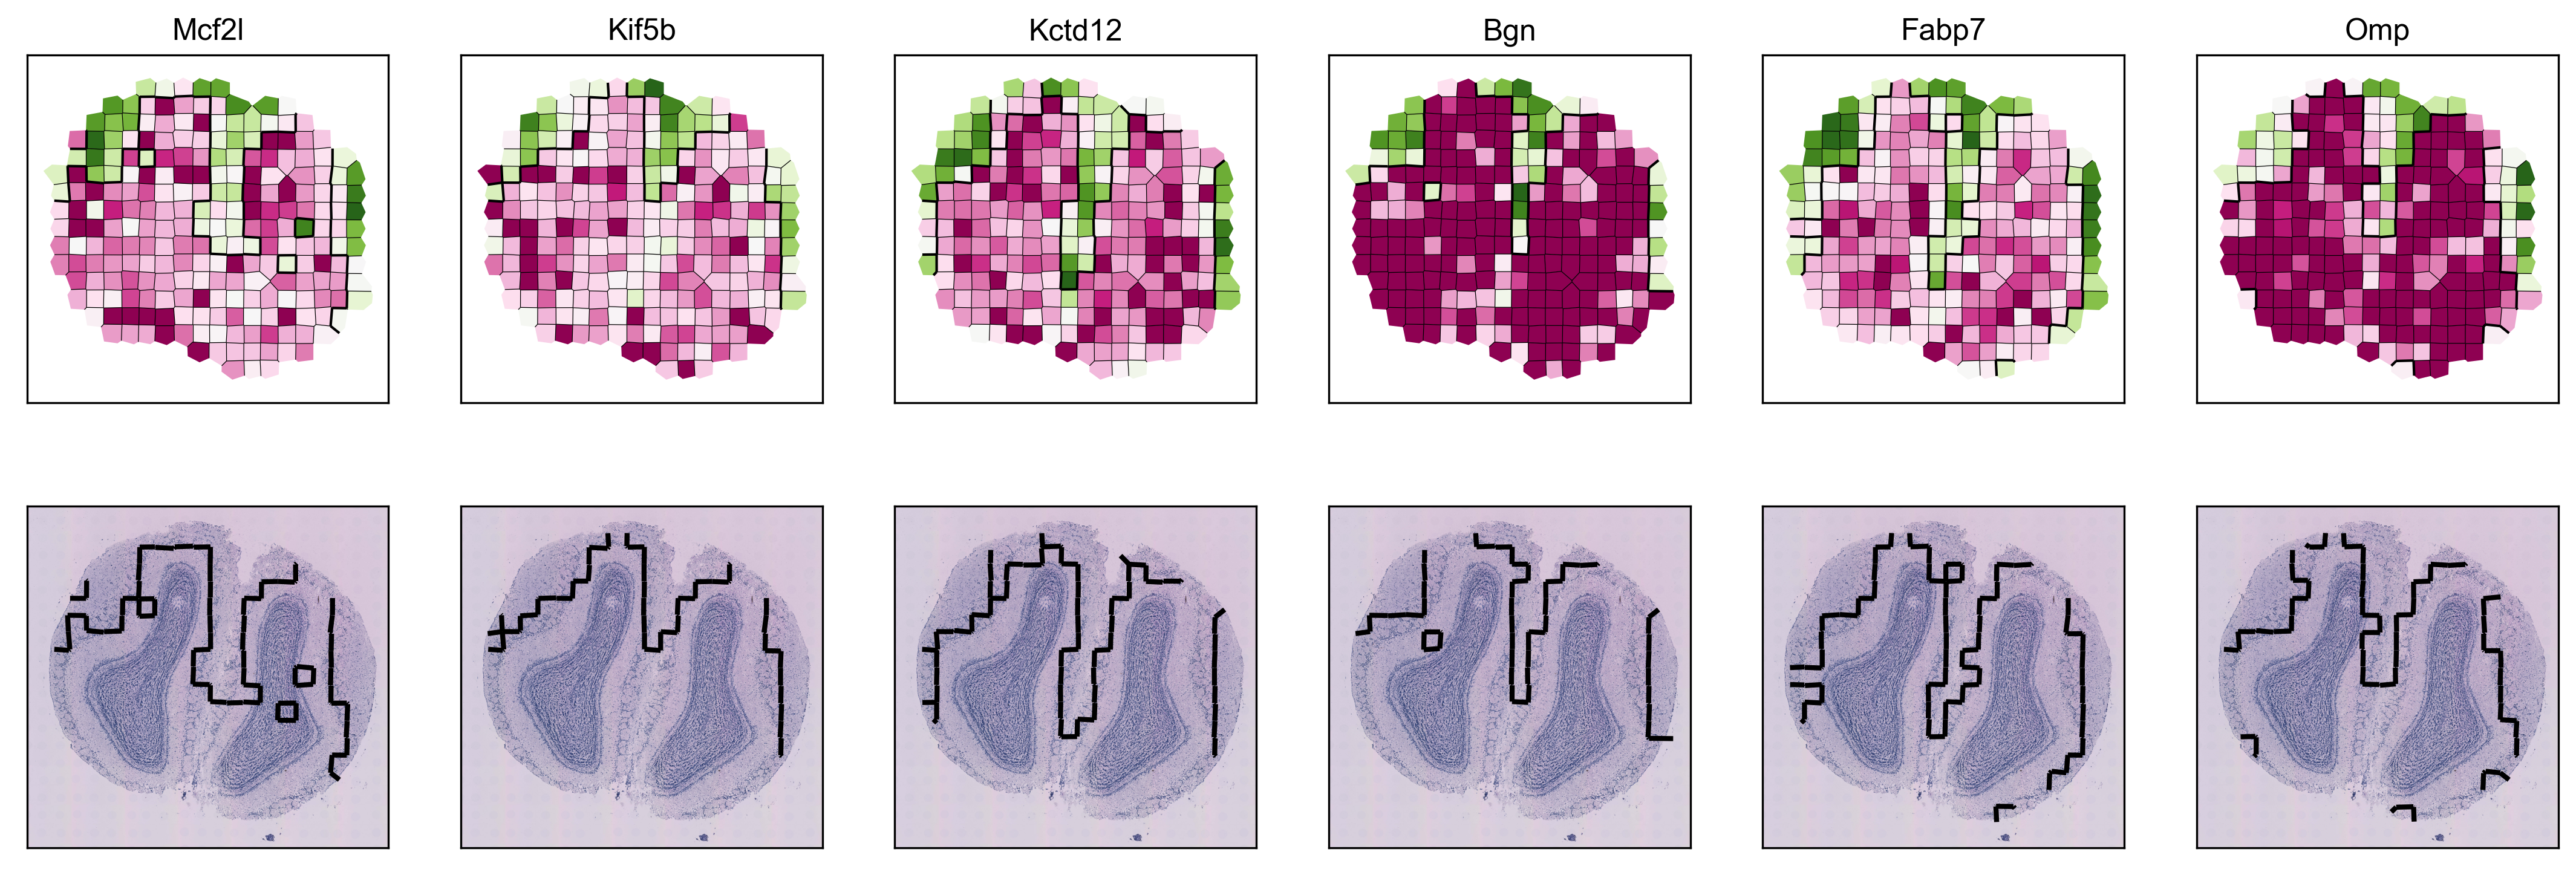

In [24]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster1):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][5:].astype(int)
    p=gco_df.loc[geneID,'fdr']
#     print(geneID,p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=1,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#plt.tight_layout()
plt.show()

#     

In [25]:
fig.savefig('../../../results/Figure//Supple_Fig4d.pdf')

2900097C17Rik 6.457519891305713e-05
Cdhr1 0.00022728150261731357
Cck 0.0001643667093113743
Doc2g 0.0001452506594107875
Slc17a7 0.0019416880799495238
Sncb 0.0004693650330211249


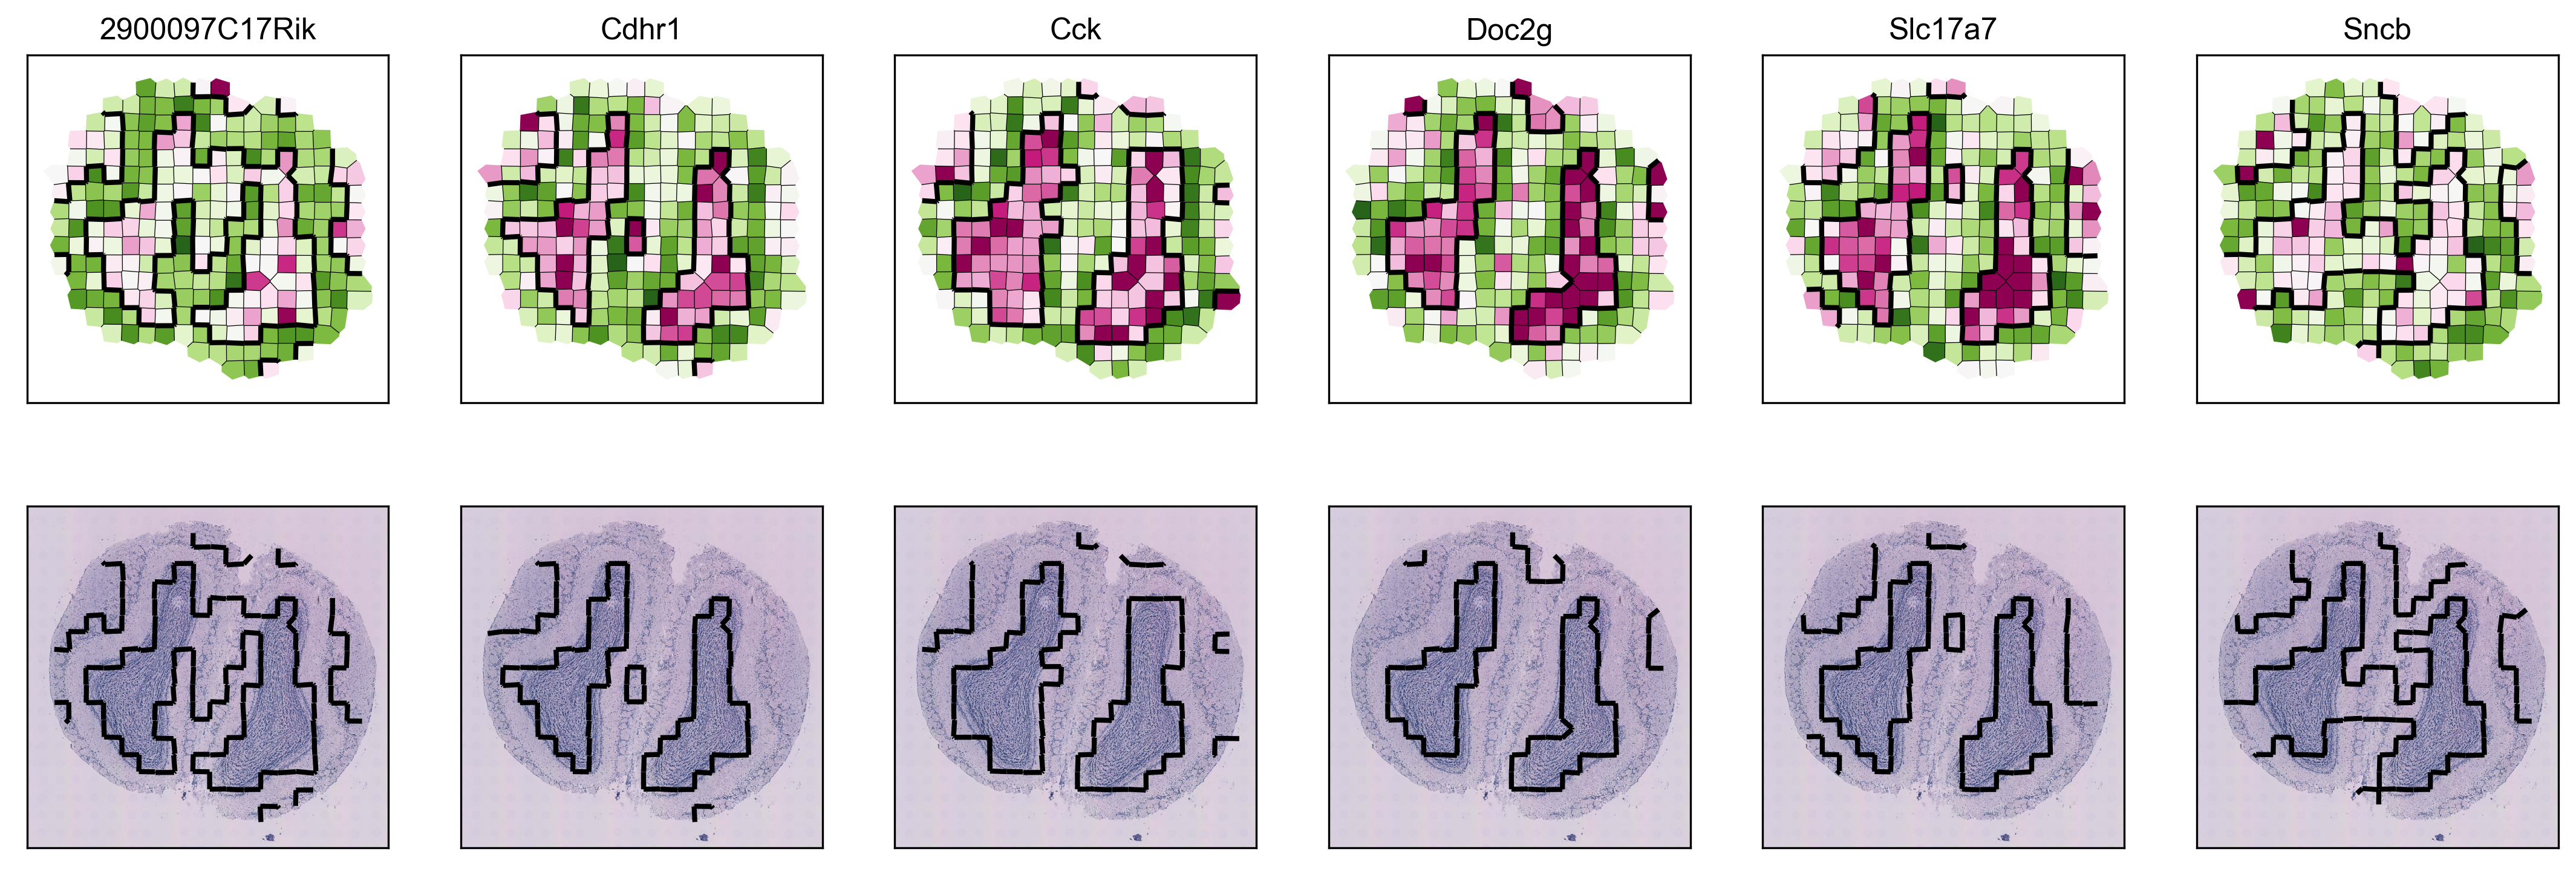

In [26]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster2):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][5:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID, p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#fig.tight_layout()

# plt.savefig('../figure/Fig2c')
plt.show()

#     

In [27]:
fig.savefig('../../../results/Figure//Supple_Fig4e.pdf')

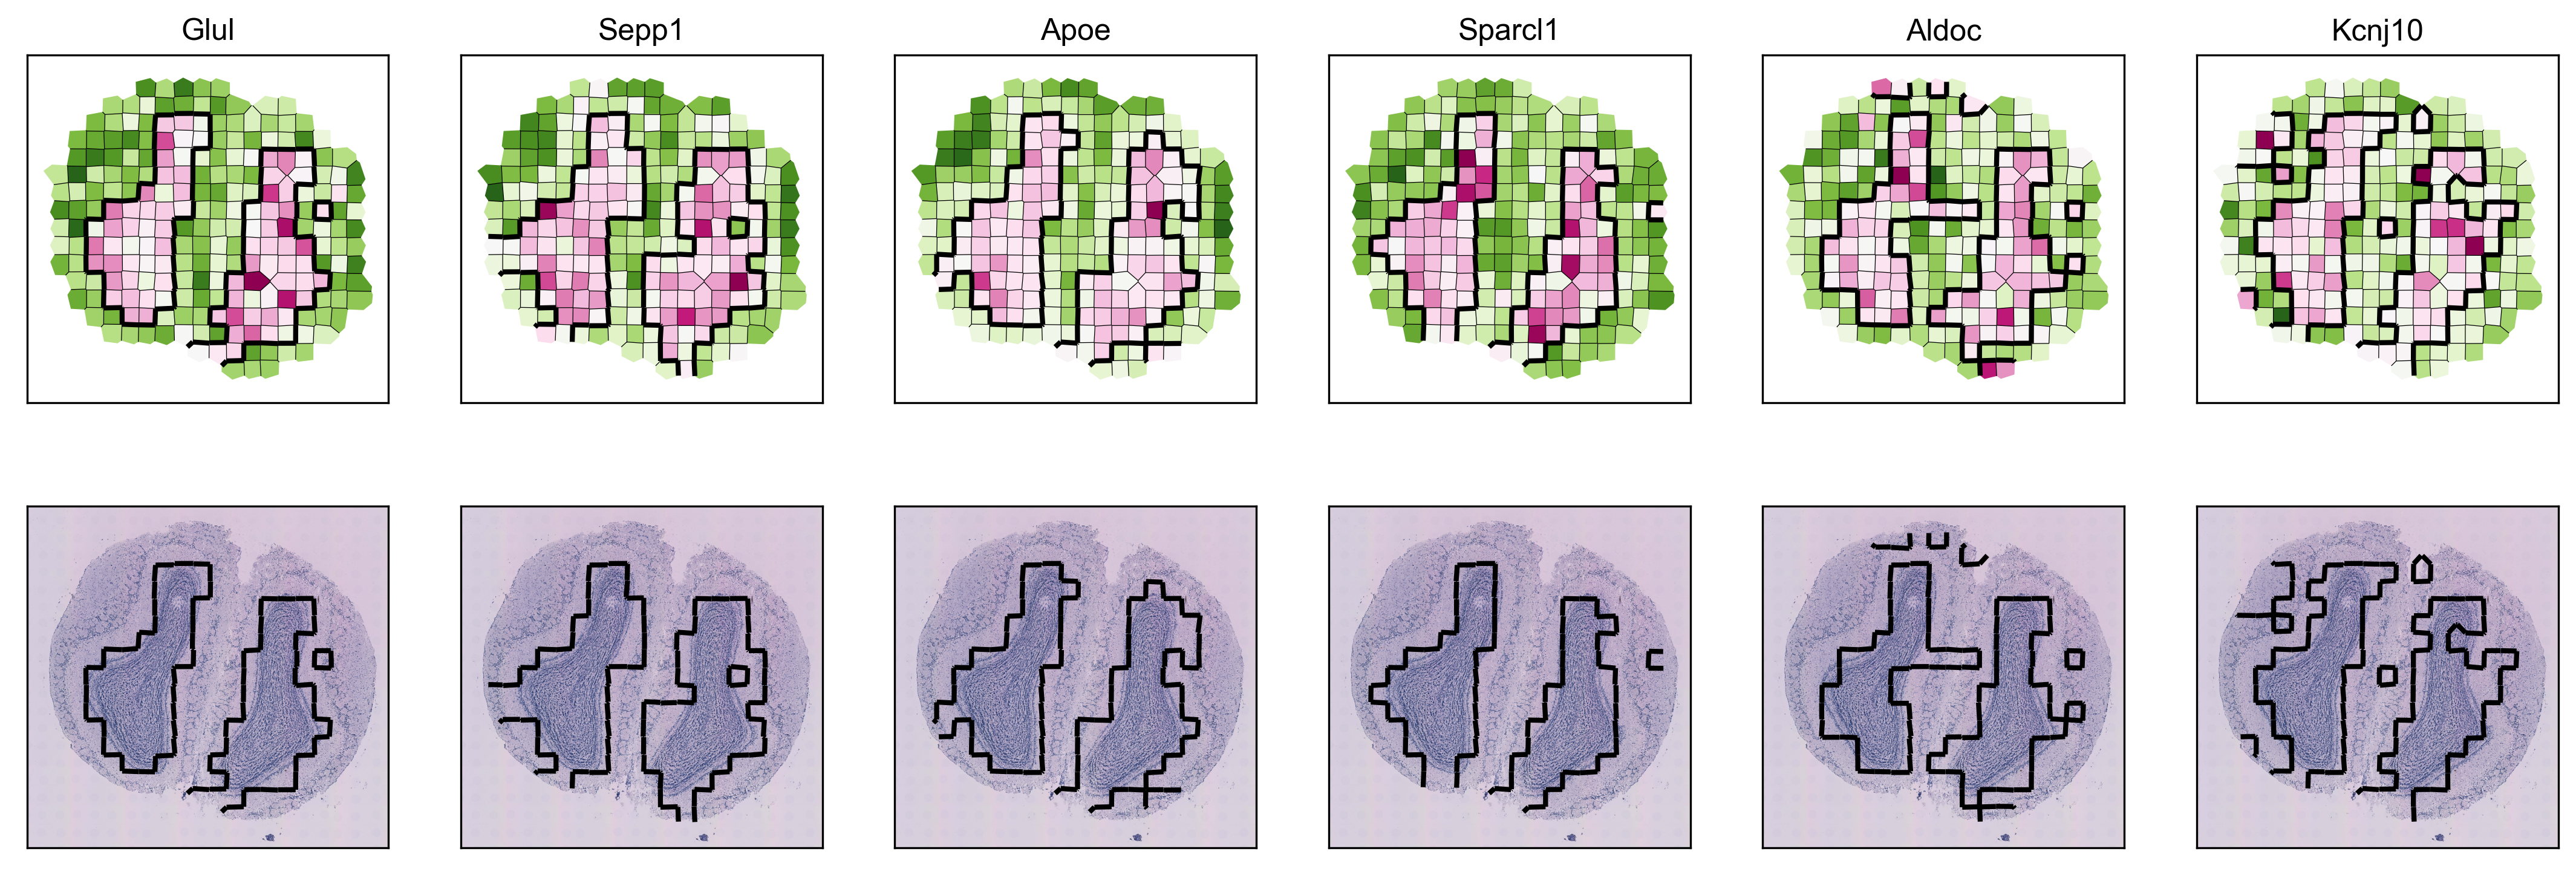

In [28]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster3):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][5:].astype(int)
    p=gco_df.loc[geneID,'fdr']
#     print(geneID, p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#fig.tight_layout()

plt.show()

#     

In [29]:
fig.savefig('../../../results/Figure//Supple_Fig4f.pdf')